# Approximate QFT

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ApproximateQFT`
An approximate QFT in which phase shifts smaller than a certain threshold are deleted.

Given a b-bit phase gradient state $|\phi\rangle$ prepared as

$$
    |\phi\rangle = \frac{1}{\sqrt{2^{b}}} \sum_{k=0}^{2^{b} - 1} \omega_{b}^{-k} |k\rangle
$$

Phase gradient rotations can be synthesized via additions into the phase gradient register.
This leads to significant reductions in T/Toffoli complexity and requires 0 arbitrary
rotations (given a one-time cost to prepare the gradient register). See the linked reference
for more details.

The QFT uses exponentially small z-power gates. In practice, it is often sufficient to perform
an approximate qft, where z-power gates smaller than a certain threshold are dropped. When using
the "add into phase-gradient trick", this amounts to doing smaller additions with a smaller
phase gradient register.

#### Parameters
 - `bitsize`: Size of input register to apply QFT on.
 - `phase_bitsize`: The size of the phase gradient register. Defaults to being math.ceil(math.log2(bitsize)).
 - `with_reverse`: Whether or not to include the swaps at the end of the circuit decomposition that reverse the order of the qubits. If True, the swaps are inserted. Defaults to True. These are technically necessary in order to perform the correct effect, but can almost always be optimized away by just performing later operations on different qubits. 

#### References
 - [Turning Gradients into Additions into QFTs](https://algassert.com/post/1620). Gidney, C. 2016.
 - [Approximation Errors](https://arxiv.org/abs/quant-ph/0008056). Panike, N. 2000.


In [2]:
from qualtran.bloqs.qft import ApproximateQFT

### Example Instances

In [3]:
approximate_qft_small = ApproximateQFT(6, 5)

In [4]:
epsilon = 1e-5
approximate_qft_from_epsilon = ApproximateQFT.from_epsilon(50, epsilon)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([approximate_qft_small, approximate_qft_from_epsilon],
           ['`approximate_qft_small`', '`approximate_qft_from_epsilon`'])

### Call Graph

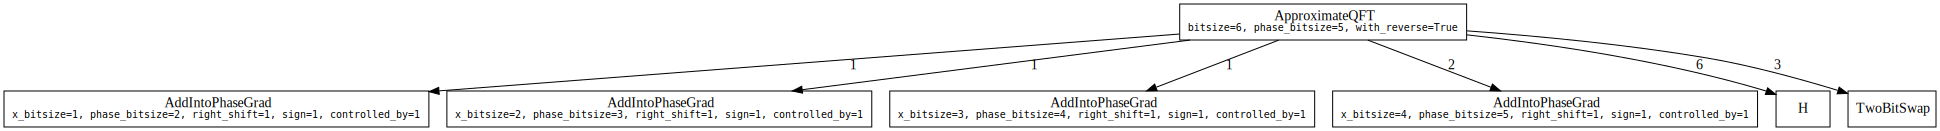

#### Counts totals:
 - `AddIntoPhaseGrad`: 1
 - `AddIntoPhaseGrad`: 1
 - `AddIntoPhaseGrad`: 1
 - `AddIntoPhaseGrad`: 2
 - `H`: 6
 - `TwoBitSwap`: 3

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
approximate_qft_small_g, approximate_qft_small_sigma = approximate_qft_small.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(approximate_qft_small_g)
show_counts_sigma(approximate_qft_small_sigma)

## Approximate QFT Cost analysis
### T-Count Expression for `ApproximateQFT`

In [7]:
from qualtran.resource_counting.t_counts_from_sigma import t_counts_from_sigma

def get_t_counts_aqft(n, eps):
    _, sigma = ApproximateQFT.from_epsilon(n, eps).call_graph()
    return t_counts_from_sigma(sigma)

get_t_counts_aqft(*sympy.symbols('n, \epsilon'))

4*n*(2*ceiling(log2(sqrt(2)*pi*n/\epsilon)) - 4)